In [1]:
import xgboost
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
def getInputOutputFolder(fileFlag=None):
    f  = open("data_file.txt", "r")
    i  = 0
    for l in f.readlines():
        if fileFlag<32:
            if i==fileFlag:
                foldName = l[:-1]
        if fileFlag==32:
            if i==fileFlag:
                foldName = l
        
        i = i+1
    f.close()
    dataNameSplit = foldName.split("/")
    inputFileName  = '../../data/'+ dataNameSplit[1]+'/inputs.csv'
    outputFileName = '../../data/'+ dataNameSplit[1]+'/outputs.csv'
    foldName       = '../../'+foldName
    return inputFileName,outputFileName,foldName,dataNameSplit[1]

In [3]:
# Input the File Number
# Not Working - 17,18,19,20,21,22,23,24,25
fileFlag = 25
inputFileName,outputFileName,foldName,dataName = getInputOutputFolder(fileFlag)
print(inputFileName)
print(outputFileName)
print(foldName)
print(dataName)

../../data/systematic/inputs.csv
../../data/systematic/outputs.csv
../../data/systematic/cv/R-3.6.0-chrom/folds.csv
systematic


In [4]:
input     = pd.read_csv(inputFileName)
label     = pd.read_csv(outputFileName)
folds     = pd.read_csv(foldName)
folds_iter = folds['fold'].unique()
print(folds_iter)
input.replace([np.inf, -np.inf], np.nan,inplace=True)

[1 2 3 4 5 6]


In [5]:
colnames       = input.columns.values
colnamesSeries = input.isna().sum()
nullColnames   = list(colnamesSeries.index[colnamesSeries>0].values)
nullColnames.append('sequenceID')
colnames       = [x for x in colnames if x not in nullColnames]

In [6]:
def chart_creation_xgboost(res,chart_title,chart_name):
    
    min_valid = round(np.min(res['test']['normal,1.0']),4)
    min_train = round(np.min(res['train']['normal,1.0']),4)
    min_iter  = round(np.nanargmin(res['test']['normal,1.0']),0)

    textstr = '\n'.join((
                    'Min Train = %.2f' % (min_train, ),
                    'Min Valid = %.2f' % (min_valid, ),
                    'Min Iter  = %.2f' % (min_iter, )))

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor="black")
    
    fig,ax1       = plt.subplots()
    ax2           = ax1.twinx()

    ln1 = ax1.plot(res['train']['normal,1.0'],color='blue',label='Training')
    ln2 = ax2.plot(res['test']['normal,1.0'],color='orange',label='Validation')
    
    lns = ln1 + ln2
    
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='lower left',fancybox='round', facecolor='wheat',fontsize=8)
    
    ax1.set_xlabel("Number of Iterations(Trees)")
    ax1.set_ylabel("Training Negative Likelihood(Loss)")
    ax2.set_ylabel("Validation Negative Likelihood(Loss)")
    ax2.text(0.7, 0.90, textstr, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
    plt.title(chart_title)
    plt.show()
    fig.savefig(chart_name)
    
def generate_result(X,y_lower,y_higher,params,X_val=None,y_lower_val=None,y_higher_val=None):
    
    res    = {}
    dtrain = xgboost.DMatrix(X)
    dtrain.set_float_info("label_lower_bound",y_lower)
    dtrain.set_float_info("label_upper_bound",y_higher)
    
    dtest  = xgboost.DMatrix(X_val)
    dtest.set_float_info("label_lower_bound",y_lower_val)
    dtest.set_float_info("label_upper_bound",y_higher_val)
    
    bst    = xgboost.train(params,dtrain,num_boost_round=50,evals=[(dtrain,"train"),(dtest,"test")],evals_result=res)
    return res


[0]	train-normal,1.0:619.306	test-normal,1.0:353.817
[1]	train-normal,1.0:422.448	test-normal,1.0:294.985
[2]	train-normal,1.0:301.543	test-normal,1.0:243.08
[3]	train-normal,1.0:223.456	test-normal,1.0:210.456
[4]	train-normal,1.0:172.304	test-normal,1.0:182.67
[5]	train-normal,1.0:136.125	test-normal,1.0:172.74
[6]	train-normal,1.0:110.863	test-normal,1.0:155.577
[7]	train-normal,1.0:93.2166	test-normal,1.0:144.572
[8]	train-normal,1.0:78.8736	test-normal,1.0:144.906
[9]	train-normal,1.0:66.6288	test-normal,1.0:136.836
[10]	train-normal,1.0:59.5736	test-normal,1.0:133.562
[11]	train-normal,1.0:53.2662	test-normal,1.0:131.082
[12]	train-normal,1.0:47.6436	test-normal,1.0:129.194
[13]	train-normal,1.0:41.37	test-normal,1.0:130.856
[14]	train-normal,1.0:35.6155	test-normal,1.0:129.477
[15]	train-normal,1.0:32.5786	test-normal,1.0:129.017
[16]	train-normal,1.0:28.8928	test-normal,1.0:131.88
[17]	train-normal,1.0:26.4956	test-normal,1.0:131.193
[18]	train-normal,1.0:23.6014	test-normal,1.

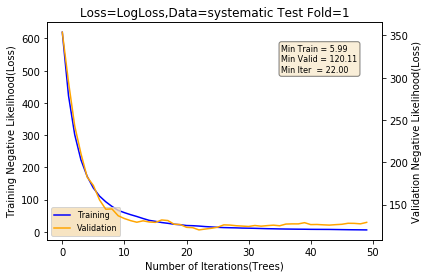

[0]	train-normal,1.0:804.855	test-normal,1.0:115.666
[1]	train-normal,1.0:545.634	test-normal,1.0:83.7787
[2]	train-normal,1.0:387.764	test-normal,1.0:64.3542
[3]	train-normal,1.0:284.822	test-normal,1.0:52.204
[4]	train-normal,1.0:215.986	test-normal,1.0:46.1136
[5]	train-normal,1.0:166.531	test-normal,1.0:43.3561
[6]	train-normal,1.0:132.732	test-normal,1.0:41.2791
[7]	train-normal,1.0:108.493	test-normal,1.0:39.1499
[8]	train-normal,1.0:92.1994	test-normal,1.0:37.4245
[9]	train-normal,1.0:77.8143	test-normal,1.0:36.3385
[10]	train-normal,1.0:66.793	test-normal,1.0:34.6888
[11]	train-normal,1.0:58.7575	test-normal,1.0:33.8226
[12]	train-normal,1.0:51.176	test-normal,1.0:33.4034
[13]	train-normal,1.0:44.4364	test-normal,1.0:33.6638
[14]	train-normal,1.0:39.0746	test-normal,1.0:33.5834
[15]	train-normal,1.0:35.9182	test-normal,1.0:32.8615
[16]	train-normal,1.0:32.4438	test-normal,1.0:33.6497
[17]	train-normal,1.0:30.7413	test-normal,1.0:33.9233
[18]	train-normal,1.0:28.1313	test-normal

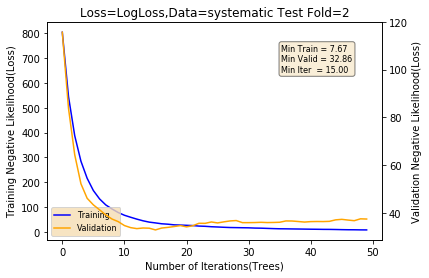

[0]	train-normal,1.0:777.719	test-normal,1.0:152.016
[1]	train-normal,1.0:521.569	test-normal,1.0:111.674
[2]	train-normal,1.0:364.953	test-normal,1.0:91.1566
[3]	train-normal,1.0:264.472	test-normal,1.0:77.856
[4]	train-normal,1.0:199.791	test-normal,1.0:69.3548
[5]	train-normal,1.0:153.514	test-normal,1.0:66.1572
[6]	train-normal,1.0:123.409	test-normal,1.0:65.3824
[7]	train-normal,1.0:98.8852	test-normal,1.0:65.3497
[8]	train-normal,1.0:83.378	test-normal,1.0:64.7635
[9]	train-normal,1.0:69.2965	test-normal,1.0:66.03
[10]	train-normal,1.0:58.3308	test-normal,1.0:68.1363
[11]	train-normal,1.0:49.6807	test-normal,1.0:72.1994
[12]	train-normal,1.0:43.5629	test-normal,1.0:74.6591
[13]	train-normal,1.0:37.5545	test-normal,1.0:75.8093
[14]	train-normal,1.0:31.9464	test-normal,1.0:78.2287
[15]	train-normal,1.0:28.1862	test-normal,1.0:82.0751
[16]	train-normal,1.0:26.1884	test-normal,1.0:84.1343
[17]	train-normal,1.0:23.4703	test-normal,1.0:87.3754
[18]	train-normal,1.0:22.5088	test-normal,

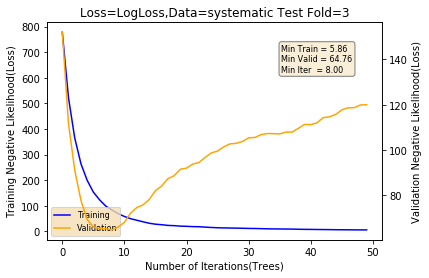

[0]	train-normal,1.0:802.781	test-normal,1.0:108.679
[1]	train-normal,1.0:543.453	test-normal,1.0:74.3275
[2]	train-normal,1.0:383.924	test-normal,1.0:54.0379
[3]	train-normal,1.0:278.688	test-normal,1.0:43.1795
[4]	train-normal,1.0:212.488	test-normal,1.0:36.7168
[5]	train-normal,1.0:168.434	test-normal,1.0:33.0079
[6]	train-normal,1.0:134.29	test-normal,1.0:30.8207
[7]	train-normal,1.0:106.638	test-normal,1.0:29.3725
[8]	train-normal,1.0:86.8486	test-normal,1.0:29.3182
[9]	train-normal,1.0:73.7629	test-normal,1.0:29.5059
[10]	train-normal,1.0:63.4372	test-normal,1.0:30.1234
[11]	train-normal,1.0:54.6365	test-normal,1.0:30.0676
[12]	train-normal,1.0:50.3536	test-normal,1.0:31.3223
[13]	train-normal,1.0:44.3606	test-normal,1.0:32.7615
[14]	train-normal,1.0:40.2813	test-normal,1.0:34.6915
[15]	train-normal,1.0:37.1012	test-normal,1.0:34.8684
[16]	train-normal,1.0:32.9311	test-normal,1.0:36.5192
[17]	train-normal,1.0:29.674	test-normal,1.0:38.2885
[18]	train-normal,1.0:28.3904	test-norma

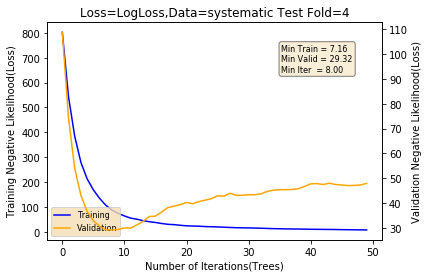

[0]	train-normal,1.0:823.767	test-normal,1.0:93.2798
[1]	train-normal,1.0:562.298	test-normal,1.0:62.5409
[2]	train-normal,1.0:399.809	test-normal,1.0:44.1111
[3]	train-normal,1.0:293.818	test-normal,1.0:32.5574
[4]	train-normal,1.0:223.034	test-normal,1.0:26.3271
[5]	train-normal,1.0:175.4	test-normal,1.0:21.1534
[6]	train-normal,1.0:141.764	test-normal,1.0:18.0251
[7]	train-normal,1.0:119.239	test-normal,1.0:16.7158
[8]	train-normal,1.0:98.946	test-normal,1.0:15.6874
[9]	train-normal,1.0:85.0432	test-normal,1.0:15.4789
[10]	train-normal,1.0:75.8073	test-normal,1.0:15.8069
[11]	train-normal,1.0:64.3113	test-normal,1.0:14.8515
[12]	train-normal,1.0:56.9964	test-normal,1.0:14.2325
[13]	train-normal,1.0:52.1507	test-normal,1.0:14.2394
[14]	train-normal,1.0:47.8168	test-normal,1.0:14.6421
[15]	train-normal,1.0:43.2908	test-normal,1.0:15.1668
[16]	train-normal,1.0:39.7877	test-normal,1.0:15.022
[17]	train-normal,1.0:36.7522	test-normal,1.0:15.2736
[18]	train-normal,1.0:33.6005	test-normal,

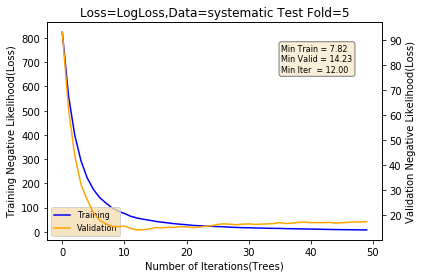

[0]	train-normal,1.0:758.206	test-normal,1.0:168.352
[1]	train-normal,1.0:509.168	test-normal,1.0:123.465
[2]	train-normal,1.0:360.194	test-normal,1.0:94.9195
[3]	train-normal,1.0:261.945	test-normal,1.0:75.7102
[4]	train-normal,1.0:198.863	test-normal,1.0:63.657
[5]	train-normal,1.0:156.093	test-normal,1.0:54.7142
[6]	train-normal,1.0:123.41	test-normal,1.0:49.9867
[7]	train-normal,1.0:102.404	test-normal,1.0:45.956
[8]	train-normal,1.0:84.781	test-normal,1.0:44.2571
[9]	train-normal,1.0:70.1835	test-normal,1.0:42.4909
[10]	train-normal,1.0:59.9926	test-normal,1.0:39.7782
[11]	train-normal,1.0:52.8624	test-normal,1.0:39.5138
[12]	train-normal,1.0:47.1245	test-normal,1.0:40.8455
[13]	train-normal,1.0:41.6078	test-normal,1.0:38.6329
[14]	train-normal,1.0:36.246	test-normal,1.0:38.5448
[15]	train-normal,1.0:32.1209	test-normal,1.0:38.3115
[16]	train-normal,1.0:29.0165	test-normal,1.0:37.8756
[17]	train-normal,1.0:26.4398	test-normal,1.0:37.281
[18]	train-normal,1.0:23.86	test-normal,1.0:

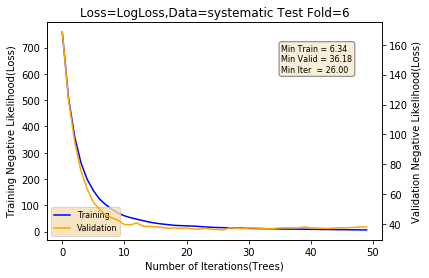

In [7]:
for i in folds_iter:
    
    test_fold    = i
    test_id      = folds[folds["fold"]==i]['sequenceID']
    train_id     = folds[folds["fold"]!=i]['sequenceID']
    nullId       = label[(label['min.log.lambda']==-float('inf'))&(label['max.log.lambda']==float('inf'))]['sequenceID']
    X            = input[input['sequenceID'].isin(train_id)&(~input['sequenceID'].isin(nullId))]
    X_val        = input[input['sequenceID'].isin(test_id)&(~input['sequenceID'].isin(nullId))]
    
    X            = X[colnames]
    X_val        = X_val[colnames]
    y_label      = label[label['sequenceID'].isin(train_id)&(~label['sequenceID'].isin(nullId))]
    y_label_test = label[label['sequenceID'].isin(test_id)&(~label['sequenceID'].isin(nullId))]
    
    y_lower      = np.array(list(map(lambda x: x if x == float('inf') or x == -float('inf') else np.exp(x),y_label['min.log.lambda'])))
    y_higher     = np.array(list(map(lambda x: x if x == float('inf') or x == -float('inf') else np.exp(x),y_label['max.log.lambda'])))
    y_lower_val  = np.array(list(map(lambda x: x if x == float('inf') or x == -float('inf') else np.exp(x),y_label_test['min.log.lambda'])))
    y_higher_val = np.array(list(map(lambda x: x if x == float('inf') or x == -float('inf') else np.exp(x),y_label_test['max.log.lambda'])))
    
    data_name    = dataName
    title        = 'Loss=LogLoss,Data='+data_name+' Test Fold='+str(test_fold)
    file_name    = title+'.png'
    
    params = {'aft_noise_distribution' : 'normal', 'aft_sigma': 1.0,'eval_metric':'aft-nloglik@normal,1.0','objective':"aft:survival"}
    bst    = generate_result(X,y_lower,y_higher,params,X_val,y_lower_val,y_higher_val)
    chart_creation_xgboost(bst,title,file_name)
    